# Comparing with assessed ranges

Here we show how the data can be processed and compared with the assessed ranges.

In [1]:
import os.path

import pandas as pd
import pyrcmip.assessed_ranges
import pyrcmip.database
import pyrcmip.metric_calculations

/Users/znicholls/Documents/AGCEC/RCMIP/pyrcmip/src/pyrcmip/assessed_ranges.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdman


In [2]:
ASSESSED_RANGES_CSV = os.path.join(
    "data",
    "rcmip-assessed-ranges",
    "assessed-ranges-v2-0-1.csv"
)
ASSESSED_RANGES_CSV

'data/rcmip-assessed-ranges/assessed-ranges-v2-0-1.csv'

In [3]:
assessed_ranges = pyrcmip.assessed_ranges.AssessedRanges(pd.read_csv(ASSESSED_RANGES_CSV))

assessed_ranges.head()

RCMIP name  \
0  Surface Air Ocean Blended Temperature Change W...   
1                    Equilibrium Climate Sensitivity   
2                         Transient Climate Response   
3            Transient Climate Response to Emissions   
4  Effective Radiative Forcing|Anthropogenic|CH4 ...   

                                  RCMIP variable RCMIP region RCMIP scenario  \
0   Surface Air Ocean Blended Temperature Change        World         ssp245   
1                                            NaN          NaN            NaN   
2                 Surface Air Temperature Change        World        1pctCO2   
3   Surface Air Temperature Change,Emissions|CO2        World        1pctCO2   
4  Effective Radiative Forcing|Anthropogenic|CH4        World     historical   

   evaluation_period_start  evaluation_period_end  norm_period_start  \
0                   2000.0                 2019.0             1961.0   
1                      NaN                    NaN                NaN   
2                      NaN                    NaN                NaN   
3                      NaN                    NaN                NaN   
4                   2011.0                 2011.0             1750.0   

   norm_period_end  very_likely__lower  likely__lower   central  \
0           1990.0            0.504604       0.518119  0.539777   
1              NaN                 NaN       1.800000  3.700000   
2              NaN                 NaN       1.300000  1.950000   
3              NaN                 NaN       0.800000  1.650000   
4           1750.0                 NaN       0.472500  0.600000   

   likely__upper  very_likely__upper     unit RCMIP evaluation method  \
0       0.561779              0.5754        K                    mean   
1       5.600000                 NaN        K          model-reported   
2       3.000000                 NaN        K                  custom   
3       2.500000                 NaN  K / TtC                  custom   
4       0.727500                 NaN  W / m^2                    mean   

                                              Source  
0                                    HadCRUT.4.6.0.0  
1                              Tokarska et al., 2020  
2                              Tokarska et al., 2020  
3  AR5 Synthesis Report Section 2.2.5 (central si...  
4  AR5 WG1 Table 8.SM.6, with extra 25% based on ...

In [4]:
sorted(assessed_ranges.db["RCMIP name"].unique())

['Atmospheric Lifetime|CH4 World historical-2005',
 'Atmospheric Lifetime|N2O World historical-2005',
 'Cumulative Net Land to Atmosphere Flux|CO2 World esm-hist-2011',
 'Cumulative Net Ocean to Atmosphere Flux|CO2 World esm-hist-2011',
 'Effective Radiative Forcing|Anthropogenic|Aerosols World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|CH4 World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|CO2 World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|F-Gases World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|Montreal Gases World historical-1750',
 'Effective Radiative Forcing|Anthropogenic|N2O World historical-1750',
 'Equilibrium Climate Sensitivity',
 'Heat Content|Ocean World ssp245 1971-2018',
 'Increase Atmospheric Concentrations|CO2 World esm-hist-2011',
 'Net Land to Atmosphere Flux|CO2 World esm-hist-1980',
 'Net Land to Atmosphere Flux|CO2 World esm-hist-1990',
 'Net Land to Atmosphere Flux|CO2 World esm-hist-2000

In [5]:
OUTPUT_DATABASE_DIR = os.path.join("data", "output", "database")
db = pyrcmip.database.Database(OUTPUT_DATABASE_DIR)
db

<utils.scmdata.Database (root_dir: data/output/database)>

In [6]:
model_reported = db.load_model_reported()
model_reported

unit  value  ensemble_member climate_model                       RCMIP name
0     K    1.5                0     two_layer  Equilibrium Climate Sensitivity
1     K    2.0                1     two_layer  Equilibrium Climate Sensitivity
2     K    2.5                2     two_layer  Equilibrium Climate Sensitivity
3     K    3.0                3     two_layer  Equilibrium Climate Sensitivity
4     K    3.5                4     two_layer  Equilibrium Climate Sensitivity
5     K    4.0                5     two_layer  Equilibrium Climate Sensitivity
6     K    4.5                6     two_layer  Equilibrium Climate Sensitivity
7     K    5.0                7     two_layer  Equilibrium Climate Sensitivity
8     K    5.5                8     two_layer  Equilibrium Climate Sensitivity
9     K    6.0                9     two_layer  Equilibrium Climate Sensitivity
10    K    6.5               10     two_layer  Equilibrium Climate Sensitivity
11    K    7.0               11     two_layer  Equilibrium Climate Sensitivity

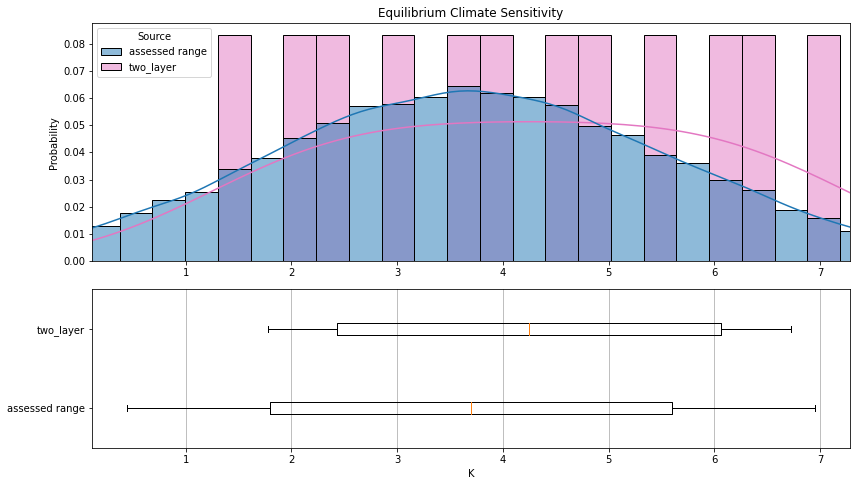

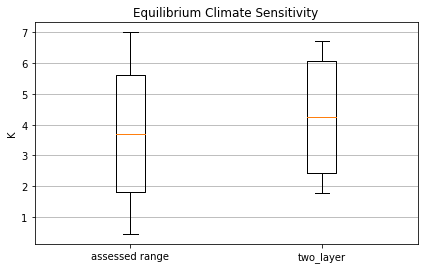

climate_model assessed_range_label  assessed_range_value  \
0     two_layer        likely__lower                   1.8   
1     two_layer              central                   3.7   
2     two_layer        likely__upper                   5.6   

   climate_model_value  percentage_difference  \
0                2.435              35.277778   
1                4.250              14.864865   
2                6.065               8.303571   

                        RCMIP name unit  
0  Equilibrium Climate Sensitivity    K  
1  Equilibrium Climate Sensitivity    K  
2  Equilibrium Climate Sensitivity    K

In [7]:
summary_table_model_reported = assessed_ranges.plot_model_reported_against_assessed_ranges(model_reported)
summary_table_model_reported

In [8]:
custom_calculators = (
    pyrcmip.metric_calculations.CalculatorTCR,
)

In [9]:
variables_of_interest = [
    v
    for v in assessed_ranges.db["RCMIP name"]
    if v
    in [
        "Transient Climate Response",
        "Surface Air Ocean Blended Temperature Change World ssp245 2000-2019",
    ]
]

assessed_ranges_small = pyrcmip.assessed_ranges.AssessedRanges(
    assessed_ranges.db[
        assessed_ranges.db["RCMIP name"]
        .isin(variables_of_interest)
        .fillna(False)
    ]
)
assessed_ranges_small.db

RCMIP name  \
0  Surface Air Ocean Blended Temperature Change W...   
2                         Transient Climate Response   

                                 RCMIP variable RCMIP region RCMIP scenario  \
0  Surface Air Ocean Blended Temperature Change        World         ssp245   
2                Surface Air Temperature Change        World        1pctCO2   

   evaluation_period_start  evaluation_period_end  norm_period_start  \
0                   2000.0                 2019.0             1961.0   
2                      NaN                    NaN                NaN   

   norm_period_end  very_likely__lower  likely__lower   central  \
0           1990.0            0.504604       0.518119  0.539777   
2              NaN                 NaN       1.300000  1.950000   

   likely__upper  very_likely__upper unit RCMIP evaluation method  \
0       0.561779              0.5754    K                    mean   
2       3.000000                 NaN    K                  custom   

                  Source  
0        HadCRUT.4.6.0.0  
2  Tokarska et al., 2020

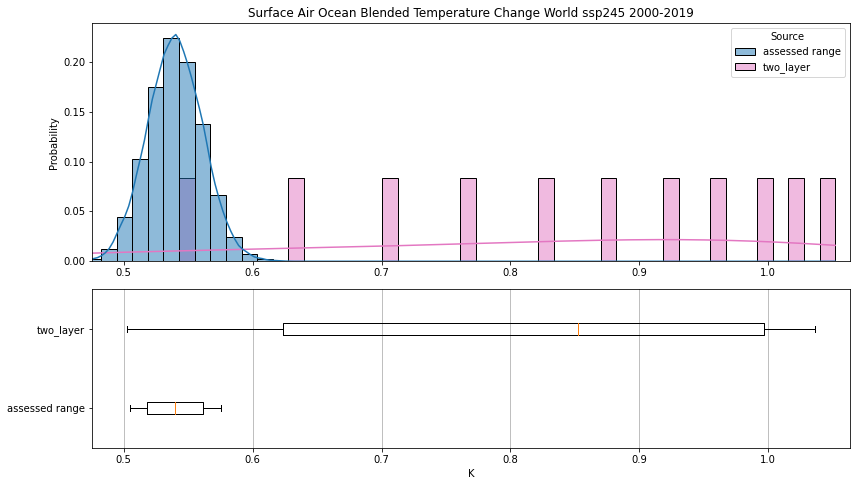

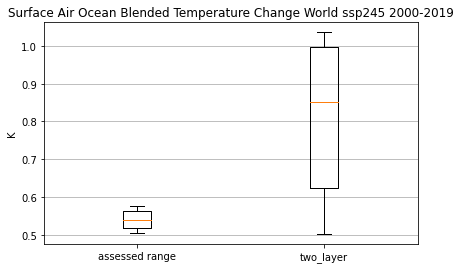

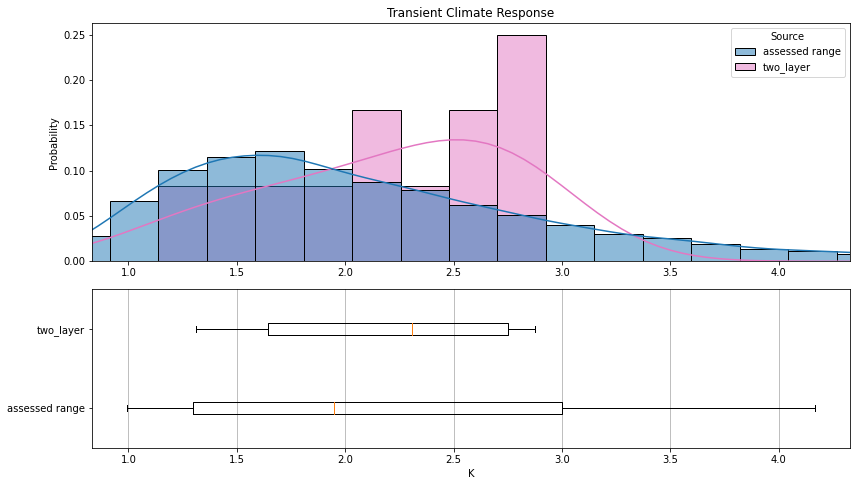

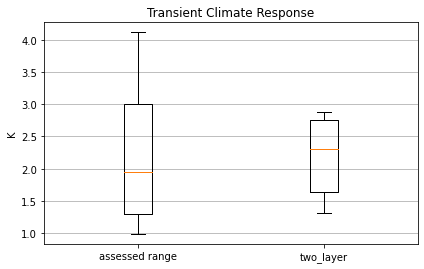

climate_model assessed_range_label  assessed_range_value  \
0     two_layer   very_likely__lower              0.504604   
1     two_layer        likely__lower              0.518119   
2     two_layer              central              0.539777   
3     two_layer        likely__upper              0.561779   
4     two_layer   very_likely__upper              0.575400   
5     two_layer        likely__lower              1.300000   
6     two_layer              central              1.950000   
7     two_layer        likely__upper              3.000000   

   climate_model_value  percentage_difference  \
0             0.502211              -0.474203   
1             0.623372              20.314496   
2             0.852057              57.853498   
3             0.996693              77.417061   
4             1.036442              80.125322   
5             1.645935              26.610357   
6             2.307759              18.346638   
7             2.750571              -8.314298   

                                          RCMIP name unit  
0  Surface Air Ocean Blended Temperature Change W...    K  
1  Surface Air Ocean Blended Temperature Change W...    K  
2  Surface Air Ocean Blended Temperature Change W...    K  
3  Surface Air Ocean Blended Temperature Change W...    K  
4  Surface Air Ocean Blended Temperature Change W...    K  
5                         Transient Climate Response    K  
6                         Transient Climate Response    K  
7                         Transient Climate Response    K

In [10]:
summary_table_derived_calcs = assessed_ranges_small.plot_against_results(db, custom_calculators=custom_calculators)
summary_table_derived_calcs

In [11]:
summary_table = pd.concat([summary_table_model_reported, summary_table_derived_calcs])
summary_table

climate_model assessed_range_label  assessed_range_value  \
0     two_layer        likely__lower              1.800000   
1     two_layer              central              3.700000   
2     two_layer        likely__upper              5.600000   
0     two_layer   very_likely__lower              0.504604   
1     two_layer        likely__lower              0.518119   
2     two_layer              central              0.539777   
3     two_layer        likely__upper              0.561779   
4     two_layer   very_likely__upper              0.575400   
5     two_layer        likely__lower              1.300000   
6     two_layer              central              1.950000   
7     two_layer        likely__upper              3.000000   

   climate_model_value  percentage_difference  \
0             2.435000              35.277778   
1             4.250000              14.864865   
2             6.065000               8.303571   
0             0.502211              -0.474203   
1             0.623372              20.314496   
2             0.852057              57.853498   
3             0.996693              77.417061   
4             1.036442              80.125322   
5             1.645935              26.610357   
6             2.307759              18.346638   
7             2.750571              -8.314298   

                                          RCMIP name unit  
0                    Equilibrium Climate Sensitivity    K  
1                    Equilibrium Climate Sensitivity    K  
2                    Equilibrium Climate Sensitivity    K  
0  Surface Air Ocean Blended Temperature Change W...    K  
1  Surface Air Ocean Blended Temperature Change W...    K  
2  Surface Air Ocean Blended Temperature Change W...    K  
3  Surface Air Ocean Blended Temperature Change W...    K  
4  Surface Air Ocean Blended Temperature Change W...    K  
5                         Transient Climate Response    K  
6                         Transient Climate Response    K  
7                         Transient Climate Response    K

In [12]:
db.save_summary_table(summary_table, "all_results")